# Imports

In [1]:
using Pkg
using Plots
Pkg.instantiate()
Pkg.precompile()

┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /home/jaime/PhD/LimberJack.jl/Manifest.toml:0
Precompiling project...
  ✓ LimberJack
  1 dependency successfully precompiled in 5 seconds (74 already precompiled)
Precompiling project...
  ✓ LimberJack
  1 dependency successfully precompiled in 4 seconds (74 already precompiled)


In [2]:
include("/home/jaime/PhD/LimberJack.jl/src/LimberJack.jl")

Main.LimberJack

In [3]:
params = LimberJack.CosmoPar(0.26, 0.05, 0.67, 0.96, 0.811, 2.755/2.7)
cosmology = LimberJack.Cosmology(params, tk_mode="EisHu");
z = [0, 1, 2];
k = [0.0001, 0.001, 0.01, 0.1, 1];

In [4]:
PkL = LimberJack.power_spectrum(cosmology, 0, cosmology.ks; non_linear=false);
Pk = LimberJack.power_spectrum(cosmology, 0, cosmology.ks);

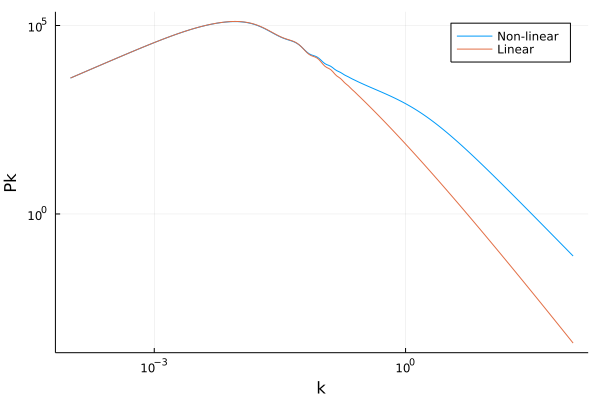

In [5]:
plot(cosmology.ks, Pk, yaxis=:log, xaxis=:log, label = "Non-linear")
plot!(cosmology.ks, PkL, yaxis=:log, xaxis=:log, label = "Linear")
xlabel!("k")
ylabel!("Pk")

In [6]:
wz = @. exp(-0.5*((cosmology.zs-0.5)/0.05)^2)
numbercounts = LimberJack.NumberCountsTracer(cosmology, cosmology.zs, wz, 1.2);

In [7]:
LimberJack.Cℓintegrand(cosmology, numbercounts, numbercounts, 0., 1000)

1.984036695203953e-15

In [8]:
LimberJack.angularCℓ(cosmology, numbercounts,
                     numbercounts, 1)

9.894646756122005e-6